Packages importeren

In [57]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import sqlite3
import sqlalchemy
import matplotlib.pyplot as plt

Connectie maken met Data Warehouse

In [58]:
DB = {'servername': 'ENVY-AKRAM\\SQLEXPRESS','database': 'Great Outdoors - Akram en Sylvan'}
conn_str = ('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')
export_conn = pyodbc.connect(conn_str, timeout=120)
export_cursor = export_conn.cursor()

engine = sqlalchemy.create_engine(f"mssql+pyodbc:///?odbc_connect={conn_str}")

# Hoe checken we of de connectie werkt?
print(export_cursor.execute("SELECT @@version;"))
'''
DB = {'servername': os.getenv('NAME'),
      'database': os.getenv('DATABASE'),
      'username': os.getenv('USER'),
      'password': os.getenv('PASSWORD')}

# Increase the connection timeout value to 30 seconds
conn_str = f"DRIVER=SQL Server;SERVER={DB['servername']};DATABASE={DB['database']};UID={DB['username']};PWD={DB['password']};Trusted_Connection=yes;Connection"

conn = pyodbc.connect(conn_str, timeout=120)
cursor = conn.cursor()
'''
export_cursor

Connectie maken met brongegevens

In [ ]:
go_sales_connection = sqlite3.connect('Data\\Brongegevens\\go_sales.sqlite')
go_crm_connection = sqlite3.connect('Data\\Brongegevens\\go_crm.sqlite')
go_staff_connection = sqlite3.connect('Data\\Brongegevens\\go_staff.sqlite')
df_inventory = pd.read_csv('Data\\Brongegevens\\GO_SALES_INVENTORY_LEVELSData.csv')
df_product = pd.read_csv('Data\\Brongegevens\\GO_SALES_PRODUCT_FORECASTData.csv')

Helper functie tables inlezen

In [ ]:
def readTable(connection, table):
    query = 'SELECT * FROM ' + table
    result = pd.read_sql_query(query, connection)
    result = result.loc[:, ~result.columns.str.contains('trial', case=False)]
    #verwijder trials
    return result

Database Go Sales

In [ ]:
tables = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', go_sales_connection)
country_go_sales = readTable(go_sales_connection, 'country')
order_details = readTable(go_sales_connection, 'order_details')
order_header = readTable(go_sales_connection, 'order_header')
order_method = readTable(go_sales_connection, 'order_method')
product = readTable(go_sales_connection, 'product')
product_line = readTable(go_sales_connection, 'product_line')
product_type = readTable(go_sales_connection, 'product_type')
retailer_site_go_sales = readTable(go_sales_connection, 'retailer_site')
return_reason = readTable(go_sales_connection, 'return_reason')
sales_branch_go_sales = readTable(go_sales_connection, 'sales_branch')
sales_staff_go_sales = readTable(go_sales_connection, 'sales_staff')
sales_targetdata = readTable(go_sales_connection, 'SALES_TARGETData')
tables  


Database Go Staff

In [ ]:
tables = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', go_staff_connection)
course = readTable(go_staff_connection, 'course')
sales_branch_go_staff = readTable(go_staff_connection, 'sales_branch')
sales_staff_go_staff = readTable(go_staff_connection, 'sales_staff')
satisfaction = readTable(go_staff_connection, 'satisfaction')
satisfaction_type = readTable(go_staff_connection, 'satisfaction_type')
training = readTable(go_staff_connection, 'training')
tables


Database Go Crm

In [56]:
tables = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', go_crm_connection)
age_group = readTable(go_crm_connection, 'age_group')
country_go_crm = readTable(go_crm_connection, 'country')
retailer = readTable(go_crm_connection, 'retailer')
retailer_contact = readTable(go_crm_connection, 'retailer_contact')
retailer_headquarters = readTable(go_crm_connection, 'retailer_headquarters')
retailer_segment = readTable(go_crm_connection, 'retailer_segment')
retailer_site_go_crm = readTable(go_crm_connection, 'retailer_site')
retailer_type = readTable(go_crm_connection, 'retailer_type')
sales_demographic = readTable(go_crm_connection, 'sales_demographic')
sales_territory = readTable(go_crm_connection, 'sales_territory')
tables

retailer_headquarters


,RETAILER_CODEMR,RETAILER_NAME,ADDRESS1,ADDRESS2,CITY,REGION,POSTAL_ZONE,COUNTRY_CODE,PHONE,FAX,SEGMENT_CODE,TRIAL222
0,1,Rock Steady,"45, rue Atwater",None,Montréal,Québec,H2T 9K8,4,1 (514) 747-4481,1 (514) 741-2277,2,T
1,10,Excellence en Montagne,"160, rue Moureaux",Bureau 410,Ville de Québec,Québec,G1B 3L5,4,1 (418) 653-6456,1 (418) 653-2311,2,T
2,11,Vacation Central,"3000, 58 Merivale Road",None,Ottawa,Ontario,K0T 9R0,4,1 (613) 736-6443,1 (613) 736-5593,6,T
3,12,Outdoor Central Ltd,"Suite 23, 180 McKercher Drive",None,Regina,Saskatchewan,S6J 3G0,4,1 (306) 243-8764,1 (306) 243-5213,2,T
4,13,Precipice Equipment,23 Blackcomb Way,None,Whistler,British Columbia,V6T 1Y8,4,1 (604) 938-7564,1 (604) 938-2324,1,T
...,...,...,...,...,...,...,...,...,...,...,...,...
409,9,Over the Top Cycles,23 Nowlan Drive,None,Moncton,New Brunswick,E1A 2A7,4,1 (506) 849-8756,1 (506) 849-6432,7,T
410,90,Weston Outfitters,738 Greyling Street,None,San Diego,California,92129,3,1 (619) 223-1235,1 (619) 223-1245,2,T
411,91,"Artículos de Campismo El Aquila, S.A. de C.V.",Avda. Chapultepec 246-303,Virreyes,Distrito Federal,México,06700,20,+(525) 684 7127,+(525) 684 7119,2,T
412,92,"Todo para el Golf, S.A. de C.V.",Francisco Munguía No. 45,Atahualpa,Monterey,Nuevo León,30530,20,+(528) 366 6773,+(528) 366 6717,3,T


# Unions

In [ ]:
sales_staff_union = pd.concat([sales_staff_go_staff, sales_staff_go_sales])
sales_staff_union.drop_duplicates(subset='SALES_STAFF_CODE', ignore_index=True, inplace=True)
sales_staff_union
#heeft overwegingen nodig op: 
#trial633/888
#manager_code


In [ ]:
sales_branch_union = pd.concat([sales_branch_go_staff, sales_branch_go_sales])
sales_branch_union.drop_duplicates(subset='SALES_BRANCH_CODE', ignore_index=True, inplace=True)
sales_branch_union
#trial633

In [ ]:
retailer_site_union = pd.concat([retailer_site_go_crm, retailer_site_go_sales])
retailer_site_union.drop_duplicates(subset='RETAILER_SITE_CODE', ignore_index=True, inplace=True)
retailer_site_union
#trial222/888

In [ ]:
country_go_crm_union = pd.merge(country_go_crm, sales_territory, on='SALES_TERRITORY_CODE', how='outer')
country_union = pd.merge(country_go_sales, country_go_crm_union, on='COUNTRY_CODE', how='outer')
country_union.drop_duplicates(subset='COUNTRY_CODE', ignore_index=True, inplace=True)
country_union
#not actually a union
#trial219/222

# Verborgen Dimensies

Date

In [ ]:
#iets

ToDate() Functions

In [ ]:
#is dit nodig?

Month

In [ ]:
#iets

# Simpele Dimensies

Return Reason

In [ ]:
def ToReasonCategory(str):

    if 'wrong' in str.lower():
        return 'Wrong Product'
    elif 'unsatisfactory' in str.lower():
        return 'Unsatisfactory'
    else:
        return 'Faulty'

return_reason_dw = return_reason.copy()
return_reason_dw['RETURN_CATEGORY'] = return_reason_dw['RETURN_DESCRIPTION_EN'].apply(ToReasonCategory)
return_reason_dw

#trial888

Course

In [ ]:
def ToCourseCategory(str):

    if 'marketing' in str.lower():
        return 'Marketing'
    elif 'sales' in str.lower():
        return 'Sales'
    elif 'management' in str.lower():
        return 'Management'
    elif 'communication' in str.lower():
        return 'Communication'
    elif 'orientation' in str.lower():
        return 'Orientation'
    else: 
        return 'Other'

course_dw = course.copy()
course_dw['COURSE_CATEGORY'] = course_dw['COURSE_DESCRIPTION'].apply(ToCourseCategory)
course_dw

#trial633

Order Method

In [ ]:
order_method_dw = order_method.copy()
#fuck de categorie
#trial888

Satisfaction Type

In [ ]:
def ToSatisfied(nr):
    try:
        return int(nr) >= 3
    except ValueError:
        return False

satisfaction_type_dw = satisfaction_type.copy
satisfaction_type_dw['SATISFIED_BOOLEAN'] = satisfaction_type['SATISFACTION_TYPE_CODE'].apply(ToSatisfied)
satisfaction_type_dw

# Merges (dimensies)

Retailer Headquarters

In [ ]:
retailer_headquarters_dw = pd.merge(
    retailer_headquarters.add_prefix('RT_HEADQUARTERS_'), country_union.add_prefix('COUNTRY_'), 
    left_on = 'RT_HEADQUARTERS_COUNTRY_CODE', right_on='COUNTRY_COUNTRY_CODE', how='outer')
retailer_headquarters_dw = pd.merge(
    retailer_headquarters_dw, retailer_segment.add_prefix('RT_SEGMENT_'), 
    left_on = 'RT_HEADQUARTERS_SEGMENT_CODE', right_on='RT_SEGMENT_SEGMENT_CODE', how='outer')
#segment category
retailer_headquarters_dw
#trial219/222

Retailer Contact

In [ ]:
retailer_contact_dw = pd.merge(
    retailer_contact.add_prefix('RT_CONTACT_'), retailer_site_union.add_prefix('RT_SITE_'), 
    left_on='RT_CONTACT_RETAILER_SITE_CODE', right_on='RT_SITE_RETAILER_SITE_CODE', how='inner')
#position category
retailer_contact_dw = pd.merge(
    retailer_contact_dw, retailer.add_prefix('RT_'), 
    left_on='RT_SITE_RETAILER_CODE', right_on='RT_RETAILER_CODE', how='inner')
retailer_contact_dw = pd.merge(
    retailer_contact_dw, retailer_type.add_prefix('RT_TYPE_'), 
    left_on='RT_RETAILER_TYPE_CODE', right_on='RT_TYPE_RETAILER_TYPE_CODE', how='inner')
retailer_contact_dw = pd.merge(
    retailer_contact_dw, retailer_headquarters_dw, 
    left_on='RT_RETAILER_CODEMR', right_on='RT_HEADQUARTERS_RETAILER_CODEMR', how='inner')
retailer_contact_dw
#trial222/888
#loc: any non americas?

Sales Staff

In [ ]:
sales_staff_dw = pd.merge(
    sales_staff_union.add_prefix('SALES_STAFF_'), sales_branch_union.add_prefix('SALES_BRANCH_'), 
    left_on='SALES_STAFF_SALES_BRANCH_CODE', right_on='SALES_BRANCH_SALES_BRANCH_CODE', how='inner')
sales_staff_dw = pd.merge(
    sales_staff_dw, country_go_sales.add_prefix('COUNTRY_'),
    left_on='SALES_BRANCH_COUNTRY_CODE', right_on='COUNTRY_COUNTRY_CODE', how='inner')
sales_staff_dw
#trial633/888

Retailer Headquarters

In [ ]:
#wat doen we hiermee?
"""
retailer_headquarters = pd.merge(
    retailer_headquarters[['RETAILER_CODEMR', 'RETAILER_NAME', 'ADDRESS1', 'ADDRESS2', 'POSTAL_ZONE', 'CITY', 'COUNTRY_CODE', 'REGION', 'PHONE', 'FAX', 'SEGMENT_CODE']], 
    country[['COUNTRY_CODE', 'COUNTRY_EN', 'FLAG_IMAGE', 'SALES_TERRITORY_CODE']], left_on='COUNTRY_CODE', right_on='COUNTRY_CODE', 
    how='inner'
    ).merge(sales_territory[['SALES_TERRITORY_CODE', 'TERRITORY_NAME_EN']], left_on='SALES_TERRITORY_CODE', right_on='SALES_TERRITORY_CODE', how='inner'
            ).merge(retailer_segment[['SEGMENT_CODE', 'LANGUAGE', 'SEGMENT_NAME', 'SEGMENT_DESCRIPTION']], left_on='SEGMENT_CODE', right_on='SEGMENT_CODE', how='inner')
retailer_headquarters
"""

Product

In [ ]:
#zijn de koloomen nodig?
#prefixes toevoegen
product_dw = pd.merge(
    product[['PRODUCT_NUMBER', 'PRODUCT_NAME', 'PRODUCT_IMAGE', 'DESCRIPTION', 'INTRODUCTION_DATE', 'PRODUCTION_COST', 'MARGIN', 'LANGUAGE', 'PRODUCT_TYPE_CODE']], 
    product_type[['PRODUCT_TYPE_CODE', 'PRODUCT_TYPE_EN', 'PRODUCT_LINE_CODE']], 
    left_on='PRODUCT_TYPE_CODE', right_on='PRODUCT_TYPE_CODE', how='inner'
    ).merge( 
        product_line[['PRODUCT_LINE_CODE', 'PRODUCT_LINE_EN']], 
        left_on='PRODUCT_LINE_CODE', right_on='PRODUCT_LINE_CODE', how='inner')
product_dw

Sales Demographic

In [ ]:
#prefixes
sales_demographic = pd.merge(
    sales_demographic[['DEMOGRAPHIC_CODE', 'SALES_PERCENT', 'RETAILER_CODEMR', 'AGE_GROUP_CODE']]
    , age_group[['AGE_GROUP_CODE', 'UPPER_AGE', 'LOWER_AGE']], left_on='AGE_GROUP_CODE', right_on='AGE_GROUP_CODE', how='inner')
sales_demographic

# Merges (feiten)

Sales Target

In [ ]:
sales_targetdata_dw = pd.DataFrame()

sales_targetdata_dw['SALES_TARGETDATA_CODE'] = sales_targetdata['Id']
sales_targetdata_dw['SALES_TARGETDATA_SALES_TARGET'] = sales_targetdata['SALES_TARGET']
sales_targetdata_dw['MONTH_YEAR'] = sales_targetdata['SALES_PERIOD']
sales_targetdata_dw['MONTH_MONTH'] = sales_targetdata['SALES_YEAR']
sales_targetdata_dw['PRODUCT_PRODUCT_NUMBER'] = sales_targetdata['PRODUCT_NUMBER']
sales_targetdata_dw['SALES_STAFF_SALES_STAFF_CODE'] = sales_targetdata['SALES_STAFF_CODE']
sales_targetdata_dw['RETAILER_RETAILER_CODE'] = sales_targetdata['RETAILER_CODE']

sales_targetdata_dw
#take month from MONTH
#ETL klopt niet - sales branch en order method verbinden niet

#trial879

Inventory Levels

In [ ]:
#->>

Training

In [ ]:
#prefixes
training = pd.merge(
    course[['COURSE_CODE', 'COURSE_DESCRIPTION']],
    training[['COURSE_CODE', 'SALES_STAFF_CODE', 'YEAR']], left_on='COURSE_CODE', right_on='COURSE_CODE', how='inner')
training

Satisfaction

In [ ]:
#prefixes
satisfaction = pd.merge(
    satisfaction[['YEAR', 'SALES_STAFF_CODE', 'SATISFACTION_TYPE_CODE']],
    satisfaction_type[['SATISFACTION_TYPE_CODE', 'SATISFACTION_TYPE_DESCRIPTION']], left_on='SATISFACTION_TYPE_CODE', right_on='SATISFACTION_TYPE_CODE', how='inner')
satisfaction

Order

In [ ]:
#->>

Returned Item

In [ ]:
#->>

Product Forecast

In [ ]:
#->>

# Naar Database pushen

To SQL

In [61]:
return_reason_dw = return_reason_dw.astype(dict)
return_reason_dw.dtypes
return_reason_dw

,RETURN_REASON_CODE,RETURN_DESCRIPTION_EN,TRIAL888,RETURN_CATEGORY
0,1,Defective product,T,Faulty
1,2,Incomplete product,T,Faulty
2,3,Wrong product ordered,T,Wrong Product
3,4,Wrong product shipped,T,Wrong Product
4,5,Unsatisfactory product,T,Unsatisfactory


In [62]:
return_reason_dw.to_sql('RETURN_REASON', engine, if_exists='replace', index=False)
course_dw.to_sql('COURSE', engine, if_exists='replace', index=False)
order_method_dw.to_sql('ORDER_METHOD', engine, if_exists='replace', index=False)
retailer_contact_dw.to_sql('RETAILER_CONTACT', engine, if_exists='replace', index=False)
retailer_headquarters_dw.to_sql('RETAILER_HEADQUARTERS', engine, if_exists='replace', index=False)
sales_staff_dw.to_sql('SALES_STAFF', engine, if_exists='replace', index=False)
sales_targetdata_dw.to_sql('SALES_TARGETDATA', engine, if_exists='replace', index=False)
satisfaction_dw.to_sql('SATISFACTION', engine, if_exists='replace', index=False)
satisfaction_type_dw.to_sql('SATISFACTION_TYPE', engine, if_exists='replace', index=False)
training_dw.to_sql('TRAINING', engine, if_exists='replace', index=False)
sales_demographic_dw.to_sql('SALES_DEMOGRAPHIC', engine, if_exists='replace', index=False)
product_dw.to_sql('PRODUCT', engine, if_exists='replace', index=False)

115

# Matplotlib

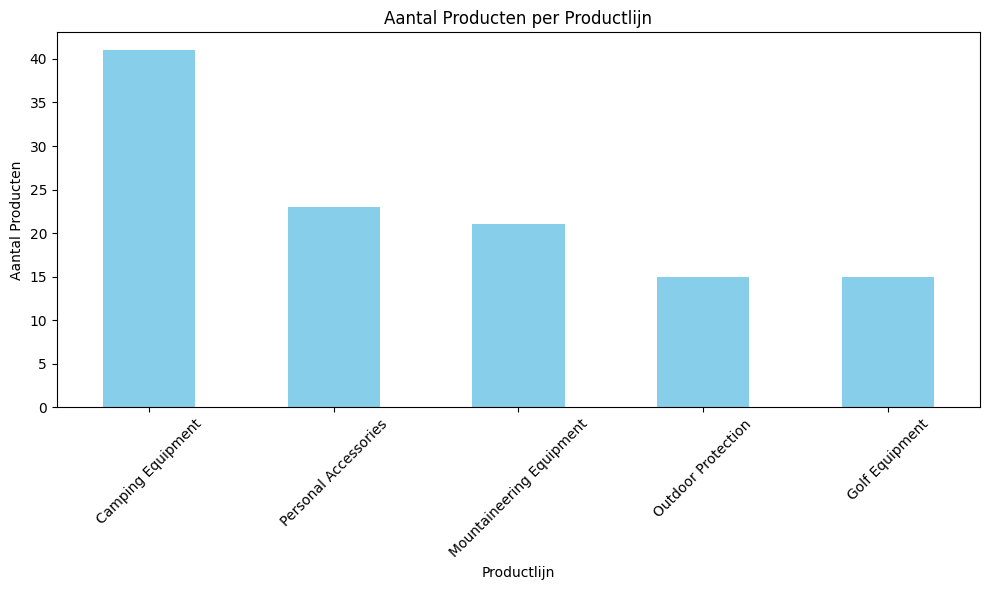

In [68]:

# Groepeer de data op productlijn en tel het aantal producten
product_per_line = product_dw['PRODUCT_LINE_EN'].value_counts()

# Maak een staafdiagram
plt.figure(figsize=(10, 6))
product_per_line.plot(kind='bar', color='skyblue')
plt.title('Aantal Producten per Productlijn')
plt.xlabel('Productlijn')
plt.ylabel('Aantal Producten')
plt.xticks(rotation=45)  # Draai de x-labels voor betere leesbaarheid
plt.tight_layout()
plt.show()


In [65]:
order_method_dw.columns.to_list()

['ORDER_METHOD_CODE', 'ORDER_METHOD_EN', 'TRIAL888']